# Scratch

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import rc
import matplotlib.font_manager
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

In [13]:
x = np.linspace(-2, 2, 4001)
y = np.linspace(-2, 2, 4001)
xx, yy = np.meshgrid(x, y)

pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy

In [14]:
pos

array([[[-2.   , -2.   ],
        [-1.999, -2.   ],
        [-1.998, -2.   ],
        ...,
        [ 1.998, -2.   ],
        [ 1.999, -2.   ],
        [ 2.   , -2.   ]],

       [[-2.   , -1.999],
        [-1.999, -1.999],
        [-1.998, -1.999],
        ...,
        [ 1.998, -1.999],
        [ 1.999, -1.999],
        [ 2.   , -1.999]],

       [[-2.   , -1.998],
        [-1.999, -1.998],
        [-1.998, -1.998],
        ...,
        [ 1.998, -1.998],
        [ 1.999, -1.998],
        [ 2.   , -1.998]],

       ...,

       [[-2.   ,  1.998],
        [-1.999,  1.998],
        [-1.998,  1.998],
        ...,
        [ 1.998,  1.998],
        [ 1.999,  1.998],
        [ 2.   ,  1.998]],

       [[-2.   ,  1.999],
        [-1.999,  1.999],
        [-1.998,  1.999],
        ...,
        [ 1.998,  1.999],
        [ 1.999,  1.999],
        [ 2.   ,  1.999]],

       [[-2.   ,  2.   ],
        [-1.999,  2.   ],
        [-1.998,  2.   ],
        ...,
        [ 1.998,  2.   ],
        [ 1.999

## Test 0

In [7]:
mu = np.array([0.1, 0])
sg = np.eye(2)

bkgd = stats.multivariate_normal(-mu, sg)
sgnl = stats.multivariate_normal(mu, sg)

ValueError: too many values to unpack (expected 2)

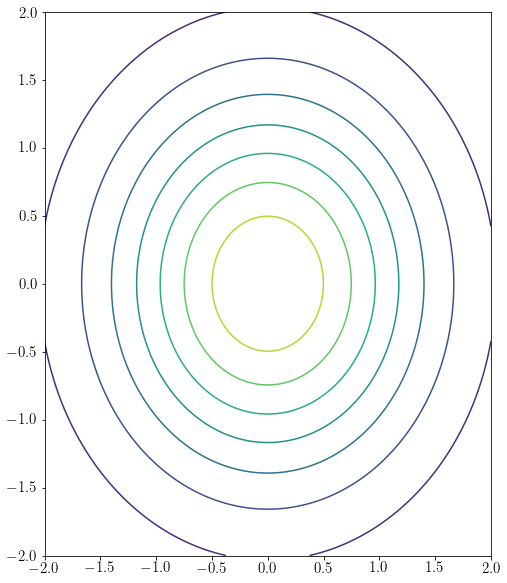

In [8]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
pos[sgnl.pdf(pos) / bkgd.pdf(pos) <= 1] = 0
pos[sgnl.pdf(pos) / bkgd.pdf(pos) >= 1] = 1
plt.pcolor(pos)
plt.gca().set_aspect('equal')

In [ ]:
plt.figure(figsize = (8, 10))
#plt.text(-2, 3, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
#plt.text(-2, 2.3, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} 0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) <= 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) >= 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'red')
plt.scatter(dd[:, 0], dd[:, 1], c = 'blue')
plt.gca().set_aspect('equal')
plt.savefig('plots/multivariate/scratch/mvn_0_2.png', 
            dpi = 300, 
            transparent = True, 
            bbox_inches = 'tight')

## Test 1

In [5]:
b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])

bkgd = stats.multivariate_normal(mu_bkgd, np.eye(2))
sgnl = stats.multivariate_normal(mu_sgnl, np.eye(2))

In [6]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'red')
plt.scatter(dd[:, 0], dd[:, 1], c = 'blue')
plt.gca().set_aspect('equal')
#plt.text(-2, 3, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -\frac{0.1}{\sqrt{2}} \\ \frac{0.1}{\sqrt{2}} \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
#plt.text(-2, 2.3, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} \frac{0.1}{\sqrt{2}} \\ -\frac{0.1}{\sqrt{2}} \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
plt.savefig('plots/multivariate/scratch/mvn_1_2.png', 
            dpi = 300, 
            transparent = True, 
            bbox_inches = 'tight')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f79487f8160> (for post_execute):


KeyboardInterrupt: 

## Test 2

In [ ]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

In [ ]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'red')
plt.scatter(dd[:, 0], dd[:, 1], c = 'blue')
plt.gca().set_aspect('equal')
#plt.text(-2, 3, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} \right)$');
#plt.text(-2, 2.3, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} 0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
plt.savefig('plots/multivariate/scratch/mvn_2_2.png', 
            dpi = 300, 
            transparent = True, 
            bbox_inches = 'tight')

## Test 3

In [ ]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

In [ ]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'red')
plt.scatter(dd[:, 0], dd[:, 1], c = 'blue')
plt.gca().set_aspect('equal')
#plt.text(-2, 3, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
#plt.text(-2, 2.3, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} 0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix} \right)$');
plt.savefig('plots/multivariate/scratch/mvn_3_2.png', 
            dpi = 300, 
            transparent = True, 
            bbox_inches = 'tight')

## Test 4

In [ ]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

In [ ]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'red')
plt.scatter(dd[:, 0], dd[:, 1], c = 'blue')
plt.gca().set_aspect('equal')
#plt.text(-2, 3, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 2 & \frac{1}{4} \\ \frac{1}{4} & 1 \end{bmatrix} \right)$');
#plt.text(-2, 2.3, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} 0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 2 & -\frac{1}{4} \\ -\frac{1}{4} & 1 \end{bmatrix} \right)$');
plt.savefig('plots/multivariate/scratch/mvn_4_2.png', 
            dpi = 300, 
            transparent = True, 
            bbox_inches = 'tight')

# Old

In [ ]:
1/0

In [ ]:
u = stats.multivariate_normal([-3, 0], [[4, 0], [0, 1]])
v = stats.multivariate_normal([3, 0], [[1, 0], [0, 4]])

In [ ]:
plt.contour(xx, yy, 0.5 * (u.pdf(pos) + v.pdf(pos)))
cc = pos[u.pdf(pos) / v.pdf(pos) < 1]
dd = pos[u.pdf(pos) / v.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'red')
plt.scatter(dd[:, 0], dd[:, 1], c = 'blue')
#ee = pos[(u.pdf(pos) / v.pdf(pos) <= 1.1) & (u.pdf(pos) / v.pdf(pos) >= 0.9)]
#plt.scatter(dd[:, 0], dd[:, 1], c = 'blue', s = .01)
plt.gca().set_aspect('equal')